# Алгоритмы кластеризации

Основная задача этого задания - реализация одного из алгоритмов кластеризации.
Кроме того, необходимо будет проверить корректность работы алгоритма на тестовых данных, проверить работу алгоритма на данных различной природы, подбирать параметры алгоритма.

In [5]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt

import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from scipy.cluster.hierarchy import dendrogram

%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 8)

# Данные

## 1. Тестовые данные

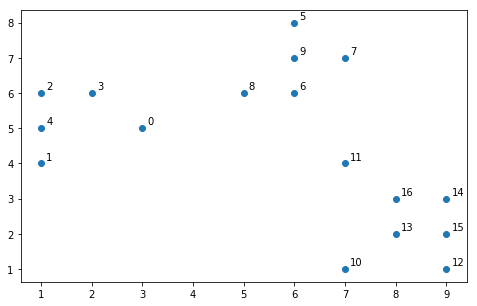

In [6]:
X_demo = np.array([
    [3, 1, 1, 2, 1, 6, 6, 7, 5, 6, 7, 7, 9, 8, 9, 9, 8],
    [5, 4, 6, 6, 5, 8, 6, 7, 6, 7, 1, 4, 1, 2, 3, 2, 3]
]).T
plt.figure(figsize=(8,5))
plt.scatter(X_demo[:,0],X_demo[:,1])
for idx, row in enumerate(X_demo):
    plt.text(row[0] + 0.1, row[1] + 0.1, idx)
plt.show()

## 2. Ирисы

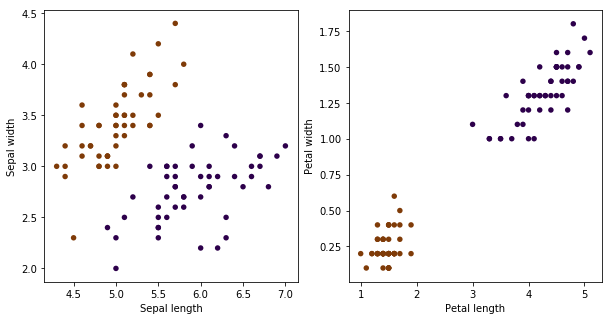

In [109]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

## 3. Стандартные распределения

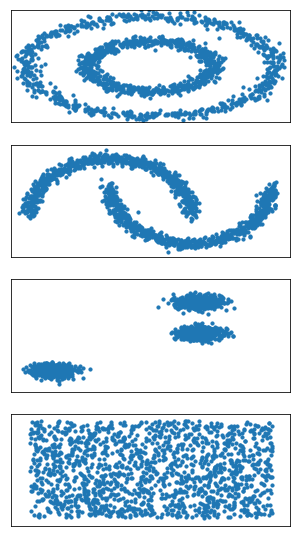

In [110]:
# http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import StandardScaler

np.random.seed(0)

n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

plt.figure(figsize=(2 + 3, 9.5))

data = [noisy_circles, noisy_moons, blobs, no_structure]
for i_dataset, dataset in enumerate(data):
    X, y = dataset
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # plot
    plt.subplot(4, 1, i_dataset + 1)
    plt.scatter(X[:, 0], X[:, 1], s=10)
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.xticks(())
    plt.yticks(())

plt.show()

## Реализация алгоритма

Необходимо выбрать и реализовать самостоятельно один из следующих алгоритмов кластеризации:
* Агломеративная иерархическая кластеризация с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)
* DBSCAN. (параметры - epsilon, min_pts)
* OPTICS(\*). (параметры - epsilon, min_pts)
* Gaussian Mixture Model(\*\*) с использованием maximum a-posteriori для выбора кластера (параметр - k)

(\*) - алгоритм не был разобран на занятии. Выбирайте этот пункт только если уверенно умеете программировать и хотите разобраться с более сложной идеей, чем DBSCAN  
(\*\*) - алгоритм не был разобран на занятии, задание повышенной сложности. Выбирайте этот пункт только если хотите разобраться со сложным математическим обоснованием и точно уверены, что сможете запрограммировать и отладить.

## Интерфейс
Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

## Иерархическая кластеризация

In [134]:
from sklearn.base import BaseEstimator, ClusterMixin

class AgglomerativeClustering(BaseEstimator, ClusterMixin):
    """
    Implement clustering algorithm according 
    """

    def get_linkage(self):
        #=======================================================
        def single_linkage(C_i, C_j):
            d_min = 1e15   
            npC_i = np.array(C_i)
            npC_j = np.array(C_j)
            if npC_i.shape == (2,): npC_i = [npC_i]
            if npC_j.shape == (2,): npC_j = [npC_j]
            for x in npC_i:
                for x_sht in npC_j:
                    d = euclidean(x, x_sht)
                    if d<d_min: d_min = d
            return d_min

        #=======================================================
        def complete_linkage(C_i, C_j):
            d_max = -1   
            npC_i = np.array(C_i)
            npC_j = np.array(C_j)
            if npC_i.shape == (2,): npC_i = [npC_i]
            if npC_j.shape == (2,): npC_j = [npC_j]
            for x in npC_i:
                for x_sht in npC_j:
                    d = euclidean(x, x_sht)
                    if d>d_max: d_max = d
            return d_max

        #=======================================================
        def average_linkage(C_i, C_j):
            mean = 0   
            npC_i = np.array(C_i)
            npC_j = np.array(C_j)
            if npC_i.shape == (2,): npC_i = [npC_i]
            if npC_j.shape == (2,): npC_j = [npC_j]
            for x in npC_i:
                for x_sht in npC_j:
                    mean = mean + euclidean(x, x_sht)
            return mean/(len(C_i)*len(C_j))

        #=======================================================
        def centroid_linkage(C_i, C_j):  
            npC_i = np.array(C_i)
            npC_j = np.array(C_j)
            if npC_i.shape == (2,): npC_i = [npC_i]
            if npC_j.shape == (2,): npC_j = [npC_j]
            m_i = [npC_i[:,0].mean(), npC_i[:,1].mean()]
            m_j = [npC_j[:,0].mean(), npC_j[:,1].mean()]   
            return euclidean(m_i, m_j)
        
        if self.method == 'single': return single_linkage
        elif self.method == 'complete': return complete_linkage
        elif self.method == 'average': return average_linkage
        else: return centroid_linkage

        
    def __init__(self, **kwargs):
        """
        Please add necessary algoritm parameters to class constructor.
        """
        self.method = kwargs.get('method', 'centroid')
        self.K = kwargs.get('K', 2)
        self.Z = None
        
    def fit(self, x, y=None):
        """
        Use data matrix x to compute model parameters
        """   
        Clusters = list()
        for point in x:
            Clusters.append([point])
        self.Z = np.array([-1.0]*(4*(len(Clusters)-1))).reshape(len(Clusters)-1, 4)
        for iter in range(0, len(Clusters)-1):
            d_min = 1e15
            for idx, row in enumerate(Clusters):
                if (idx in self.Z[:,0]) or (idx in self.Z[:,1]): continue
                for i in range(idx+1,len(Clusters)):
                    if (i in self.Z[:,0]) or (i in self.Z[:,1]): continue
                    linkage = self.get_linkage()
                    d = linkage(row, Clusters[i])
                    if d<d_min: 
                        d_min = d
                        U_i = idx
                        V_i = i
            self.Z[iter] = [U_i, V_i, d_min, len(Clusters[U_i]) + len(Clusters[V_i])]
            new_clast = list() 
            for u in Clusters[U_i] + Clusters[V_i]: new_clast.append(u)
            Clusters.append(new_clast)  
        return self.Z
    
    
    def predict(self, x):
        """
        Using computed model parameters predict cluster
        for all objects from x
        """
        y_pred = np.array([-1.0]*len(x))
        m = len(x) - 1
        
        def set_y(Cl, label):
            #print(Cl, label)
            for index in Cl:
                if index<=m: 
                    y_pred[int(index)] = label
                    Flag = False                    
                else: Flag = set_y(self.Z[int(index)-m-1,0:2], label)               
            return Flag
        
        Clusters = self.Z[self.Z.shape[0]-self.K-1:self.Z.shape[0]-1,0:2]        
        for i, cluster in enumerate(Clusters):
            Flag = True
            while Flag:
                Flag = set_y(cluster, i)
        return self.Z, y_pred
    
    
    def fit_predict(self, x, y=None):
        self.fit(x, y)
        return self.predict(x)

## DBSCAN

In [135]:
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.neighbors import NearestNeighbors

class DBSCANClustering(BaseEstimator, ClusterMixin):
    """
    Implement clustering algorithm according 
    """       
    def __init__(self, **kwargs):
        self.eps=kwargs.get('eps', 1)
        self.min_pts=kwargs.get('min_pts', 2)
        
    
    def select_param(self, X):
        nbrs = NearestNeighbors(n_neighbors=self.min_pts+1, algorithm='kd_tree').fit(X)
        distances, indices = nbrs.kneighbors(X)
        mean_dist=[]
        for p in distances:            
            mean_dist.append(p.sum()/self.min_pts)
        mean_dist.sort()
        plt.figure(figsize=(8,5))
        plt.plot(range(len(mean_dist)), mean_dist)
        #plt.show()        
        return plt
    
    
    def fit(self, X, y=None):
        self.nbrs = NearestNeighbors(algorithm='kd_tree').fit(X)              
        return self.nbrs
    
    
    def predict(self, X):
        def expand_cluster(X, NV, neighbors_ind, noise, idx, nbr, Cl, y, eps, min_pts):
            Cl[len(Cl)-1].append([X[idx]]) 
            y[idx] = len(Cl)-1
            for idx_1 in (ind for ind in nbr):              
                if idx_1 in NV:                    
                    NV.remove(idx_1)
                    nbr1 = [index for index in neighbors_ind[idx_1] if index!=idx_1]   
                    if len(nbr1) >= min_pts: 
                        for p in nbr1:
                            if p not in nbr: nbr.append(p)
                    else: noise.append(idx_1)  
                    Cl[len(Cl)-1].append([X[idx_1]])
                    y[idx_1] = len(Cl)-1
                    
                    
        noise = list()
        C = list()   
        y = [-1 for _ in X]
        neighbors_dist, neighbors_ind = self.nbrs.radius_neighbors(X, radius=self.eps)      
        NV = list(range(0,len(X)))
        while len(NV)>0:
            for idx in (index for index in NV):
                NV.remove(idx)
                nbr = [index for index in neighbors_ind[idx]]
                if len(nbr)<self.min_pts: 
                    noise.append(idx)
                else:
                    C.append([])
                    expand_cluster(X, NV, neighbors_ind, noise, idx, nbr, C, y, self.eps, self.min_pts)    
                    break
        return neighbors_ind, neighbors_dist, y, noise            
    
    
    def fit_predict(self, X, y=None):
        self.fit(X, y)
        return self.predict(X)

## OPTICS

In [136]:
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.neighbors import NearestNeighbors


class Point:
    def __init__(self, **kwargs):
        self.index = int(kwargs.get('index'))
        self.coord = kwargs.get('coord')                   
        self.core_dist = kwargs.get('core_dist')
        self.reachability_dist = kwargs.get('reachability_dist')
        self.visited = kwargs.get('visited', False)
        
        self.neighbors = kwargs.get('neighbors') 
        dic = {}
        for i in range(0,len(self.neighbors[1])):
            dic[int(self.neighbors[1][i])] = self.neighbors[0][i]
        dic = sorted(dic.items(), key=lambda x:x[1])
        self.neighbors = dic[1:]
        
    def get_core_distance(self, min_pts):
        if len(self.neighbors)>=min_pts: return self.neighbors[min_pts-1][1]        
        else: return None    
            
            
class OPTICSClustering(BaseEstimator, ClusterMixin):
    """
    Implement clustering algorithm according 
    """
 
    def __init__(self, **kwargs):
        self.eps=kwargs.get('eps', 1)
        self.eps_s=kwargs.get('eps_s', 1)
        self.min_pts=kwargs.get('min_pts', 2)
        self.order_list = []
        self.points = []
        self.nbrs = None
        self.neighbors = None
 

    def select_param(self, X):
        nbrs = NearestNeighbors(n_neighbors=self.min_pts+1, algorithm='kd_tree').fit(X)
        distances, indices = nbrs.kneighbors(X)
        mean_dist=[]
        for p in distances:            
            mean_dist.append(p.sum()/self.min_pts)
        mean_dist.sort()
        plt.figure(figsize=(8,5))
        plt.plot(range(len(mean_dist)), mean_dist)
        return plt 

    def show_clasters(self):
        data1=[] 
        data2=[]
        for p in self.order_list:
            if p.reachability_dist is not None: 
                data1.append(str(p.index))
                data2.append(p.reachability_dist)
        plt.bar(np.arange(len(data2)), data2, 1, tick_label=data1)
        return plt
    
    def fit(self, X, y=None):          
        self.nbrs = NearestNeighbors(algorithm='kd_tree').fit(X)        
        self.neighbors = self.nbrs.radius_neighbors(X, radius=self.eps)
        for idx, x in enumerate(X): 
            self.points.append(Point(index=idx, coord=x, neighbors=[self.neighbors[0][idx], self.neighbors[1][idx]])) 
#        for idx, p in enumerate(self.points):
#            print(idx, p.index, p.coord, p.neighbors, p.core_dist, p.reachability_dist, p.visited)
        return self
    
    
    def predict(self, X):
        def get_not_visited():
            for p in self.points:
                if p.visited is not True: yield p            
        
        def add_to_order_list(order_list, q):
            isAlready = False
            for s in order_list:
                if s.index == q.index: isAlready = True
            if isAlready is not True: order_list.append(q)
                
        def clustering(order_list, eps_s):
            y = [-1]*len(X)
            ClusterID = -1
            for p in order_list:
                if (p.reachability_dist is None) or (p.reachability_dist>eps_s):
                    if (p.core_dist is not None) and (p.core_dist<=eps_s):
                        ClusterID += 1
                        y[p.index] = ClusterID
                    else: y[p.index] = -1
                else: y[p.index] = ClusterID
            return y
        
        def update_order_seeds(p, order_seeds):
            for index, dist in p.neighbors:
#                print('update_order_seeds. In process point #{} from neighbors of point#{}'.format(index, p.index))
                o = self.points[index]
#                print('update_order_seeds. In process point #',o.index)
                if o.visited is not True:
#                    print('update_order_seeds. In process point #{} with visited: {}'.format(o.index, o.visited))
                    new_r_dist = max(p.core_dist, euclidean(p.coord, o.coord))
#                    print('update_order_seeds. New_r_dist:',new_r_dist)
                    if o.reachability_dist is None:
                        o.reachability_dist = new_r_dist
#                        print('update_order_seeds. In process point #{} with reachability_dist: {}'.format(o.index, o.reachability_dist))
                        order_seeds.append(o)                        
#                        for idx, q in enumerate(order_seeds):
#                            print('update_order_seeds. Order_seeds before sorted:',idx, q.index, q.reachability_dist)                           
                        order_seeds.sort(key=lambda x: x.__dict__['reachability_dist']) 
#                        for idx, q in enumerate(order_seeds):
#                            print('update_order_seeds. Order_seeds after sorted:',idx, q.index, q.reachability_dist)
                    else:
                        if new_r_dist < o.reachability_dist:
                            for point in order_seeds:
                                if point.index == o.index:
                                    point.reachability_dist = new_r_dist
                            order_seeds.sort(key=lambda x: x.__dict__['reachability_dist'])
                            
        
        def expand_cluster_order(p):            
            p.visited = True
            p.core_dist = p.get_core_distance(self.min_pts)
            #p.reachability_dist = p.core_dist
#            print('expand_cluster_order. In process point #',p.index,p.core_dist)
            add_to_order_list(self.order_list, p)
#            print('expand_cluster_order. Order_list:',self.order_list)
            if p.core_dist is not None:
                order_seeds = []                
#                for idx, q in enumerate(order_seeds):
#                    print('expand_cluster_order. Order_seeds before sorted:',idx, q.index, q.reachability_dist)                
                #order_seeds.append(p)
                update_order_seeds(p, order_seeds)                
#                for idx, q in enumerate(order_seeds):
#                    print('expand_cluster_order. Order_seeds after sorted:',idx, q.index, q.reachability_dist)                   
                for o in order_seeds:                    
                    o.visited = True
                    o.core_dist = o.get_core_distance(self.min_pts)
#                    print('expand_cluster_order. In process point #',o.index, o.visited, o.core_dist, o.reachability_dist)                    
                    #self.order_list.append(o)                   
#                    for idx, q in enumerate(self.order_list):
#                        print('expand_cluster_order. Order_list:', q.index, q.reachability_dist)                        
                    if o.core_dist is not None:
#                        for idx, q in enumerate(order_seeds):
#                            print('expand_cluster_order. Order_seeds before:',idx, q.index, q.reachability_dist)                    
                        update_order_seeds(o, order_seeds)                        
#                        for idx, q in enumerate(order_seeds):
#                            print('expand_cluster_order. Order_seeds after:',idx, q.index, q.reachability_dist)                              
                for q in order_seeds:
                    add_to_order_list(self.order_list, q)
                    
#                for idx, q in enumerate(self.order_list):
#                    print('expand_cluster_order. Order_list:', q.index, q.reachability_dist, q.visited)                

        for p in get_not_visited():
#            print('Main. In process point #',p.index)
            expand_cluster_order(p)
            
#            for idx, o in enumerate(self.points):
#                print(idx, o.index, o.coord, o.reachability_dist, o.visited)
        y = clustering(self.order_list, self.eps_s)
    
        return self.order_list, y            
    
    
    def fit_predict(self, X, y=None):
        self.fit(X, y)
        return self.predict(X)

## GMM

In [137]:
from sklearn.base import BaseEstimator, ClusterMixin

class GMMClustering(BaseEstimator, ClusterMixin):
    
    def __init__(self, **kwargs):
        self.K = kwargs.get('K', 2)
        self.max_iter = kwargs.get('max_iter', 10)       

        
    def fit(self, X, y=None):
        
        def mahalanobis(x, mu, SIGMA):
            n = len(x)
            return float((x-mu).reshape(1, n).dot(np.linalg.inv(SIGMA)).dot((x-mu).reshape(n, 1)))
        
        def dot_vector(a,b):
            d = np.zeros((len(a),len(b)))
            for i, x in enumerate(a):
                for j, y in enumerate(b):
                    d[i,j] = x*y
            return d        
            
        n = X.shape[1]
        m = X.shape[0]
        self.E = np.random.rand(n, self.K)
        #print(C)
        self.R = []
        for i in range(self.K): self.R.append(np.eye(n))
        #print(R)
        self.W = np.array([1/self.K]*self.K)
        #print(W)
        self.g = np.zeros((m, self.K))
        pi = np.zeros(self.K)
        
        llh = 0
        llh_old = 0
        delta_llh = 1000
        iteration = 0
        while iteration<self.max_iter:
            #============ E-шаг ===========
            llh = 0
            for i, x in enumerate(X):
                sum_pij = 0
                for j in range (self.K):
                    #print ('R[j] =',R[j])
                    delta = mahalanobis(x, self.E[:,j], self.R[j])
                    #print (delta)                
                    pi[j] = self.W[j]*np.exp(-delta/2)/((2*np.pi)**(n/2)*np.sqrt(np.linalg.det(self.R[j])))
                    #print('j=',j,'pi[j]=',pi[j])
                    sum_pij += pi[j]
                    #print('sum_pij',sum_pij)
                for j in range (self.K):
                    self.g[i,j] = pi[j]/sum_pij
                #print ('sum_pij = ', sum_pij)
                llh += np.log(sum_pij)
                #print(g)

            #============= М-шаг ==========
            for j in range (self.K):
                self.W[j]=self.g[:,j].sum()/m
                s_mu = np.zeros(n)
                s_r = np.zeros((n,n)) 
                for i, x in enumerate(X):
                    s_mu += self.g[i,j]*x
                self.E[:,j] = s_mu/(m*self.W[j])
                for i, x in enumerate(X):
                    #print('x=', x, 'E[:,j]=', E[:,j], 'g[i,j]=', g[i,j])
                    s_r += dot_vector((x-self.E[:,j])*self.g[i,j],(x-self.E[:,j]))
                    #print ('s_r=',s_r)
 
                self.R[j] = s_r/(m*self.W[j])
            iteration += 1
            delta_llh = np.abs(llh_old - llh)
            #print ('llh_old = ', llh_old, 'llh = ', llh, 'delta_llh = ',delta_llh)            
            llh_old = llh 
        return self.g, self.E, self.R, self.W
    
    
    def predict(self, X):
        y = [-1]*len(X) 
        for i, el in enumerate(self.g):
            y[i]=np.argmax(el)            
        return y
    
    
    def fit_predict(self, X, y=None):
        self.fit(X, y)
        return self.predict(X)

# Тестирование алгоритмов
## Иерархическая кластеризация
### 1. Ирисы

In [138]:
Z, pred_iris = AgglomerativeClustering(method = 'single').fit_predict(x_iris)
print ("Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris))

Adjusted Rand index for iris is: 1.00


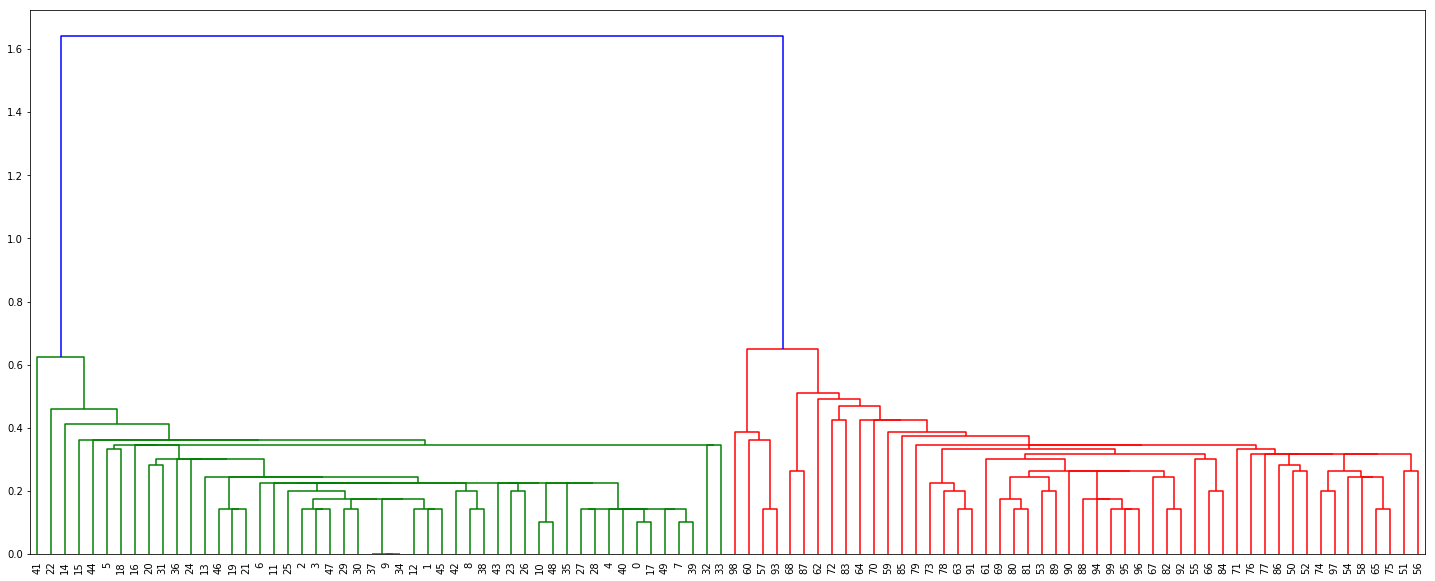

In [139]:
plt.figure(figsize=(25, 10))
dend = dendrogram(Z, leaf_font_size=10) 

### 2. Стандартные распределения

In [149]:
#При n_samples=1500 считает очень долго, поэтому решил уменьшить объем
noisy_circles_lite = datasets.make_circles(n_samples=150, factor=.5, noise=.05)
noisy_moons_lite = datasets.make_moons(n_samples=150, noise=.05)
blobs_lite = datasets.make_blobs(n_samples=150, random_state=8)

In [150]:
%%time
X=noisy_circles_lite[0]
Y=noisy_circles_lite[1]
Z, y_pred = AgglomerativeClustering(method = 'single').fit_predict(X)
print ("Adjusted Rand index for noisy_circles is: %.2f" % smt.adjusted_rand_score(Y, y_pred))

Adjusted Rand index for noisy_circles is: 1.00
Wall time: 1min 29s


In [151]:
%%time
X=noisy_moons_lite[0]
Y=noisy_moons_lite[1]
Z, y_pred = AgglomerativeClustering(method = 'single').fit_predict(X)
print ("Adjusted Rand index for noisy_moons is: %.2f" % smt.adjusted_rand_score(Y, y_pred))

Adjusted Rand index for noisy_moons is: 1.00
Wall time: 1min 30s


In [152]:
%%time
X=blobs_lite[0]
Y=blobs_lite[1]
Z, y_pred = AgglomerativeClustering(method = 'centroid').fit_predict(X)
print ("Adjusted Rand index for blobs is: %.2f" % smt.adjusted_rand_score(Y, y_pred))

Adjusted Rand index for blobs is: 0.57
Wall time: 1min 32s


## DBSCAN
### 1. Тестовые данные

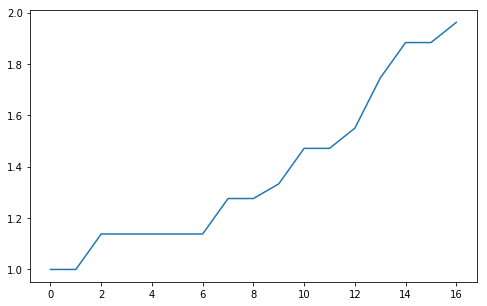

In [30]:
dbscan_demo = DBSCANClustering(eps=2, min_pts=3)
PL = dbscan_demo.select_param(X_demo)

In [242]:
neighbors_ind, neighbors_dist, y, noise = DBSCANClustering(eps=2, min_pts=2).fit_predict(X_demo)
print('y = ', y)

y =  [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2]


### 2. Ирисы

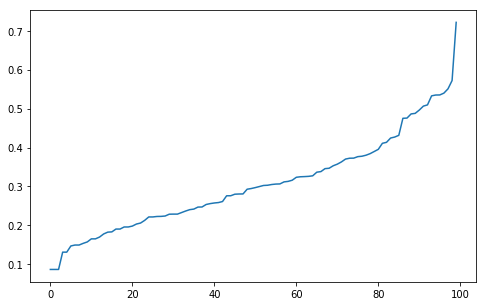

In [31]:
dbscan = DBSCANClustering(min_pts=4)
PL = dbscan.select_param(x_iris)

In [241]:
neighbors_ind, neighbors_dist, y, noise = DBSCANClustering(eps=0.7, min_pts=4).fit_predict(x_iris)
print ("Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, y))

Adjusted Rand index for iris is: 1.00


### 3. Стандартные распределения

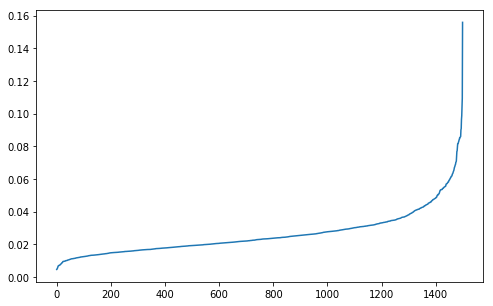

In [32]:
X_circles = noisy_circles[0]
Y_circles = noisy_circles[1]
dbscan = DBSCANClustering(min_pts=3)
PL = dbscan.select_param(X_circles)

In [310]:
neighbors_ind, neighbors_dist, y_pred_circles, noise = DBSCANClustering(eps=0.1, min_pts=3).fit_predict(X_circles)
print ("Adjusted Rand index for noisy_circles is: %.2f" % smt.adjusted_rand_score(Y_circles, y_pred_circles))

Adjusted Rand index for noisy_circles is: 1.00


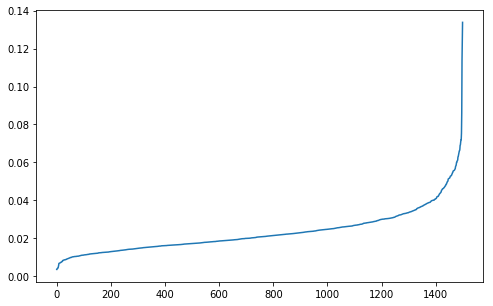

In [33]:
X_moons = noisy_moons[0]
Y_moons = noisy_moons[1]
dbscan = DBSCANClustering(min_pts=3)
PL = dbscan.select_param(X_moons)

In [301]:
neighbors_ind, neighbors_dist, y_pred_moons, noise = DBSCANClustering(eps=0.1, min_pts=3).fit_predict(X_moons)
print ("Adjusted Rand index for noisy_moons is: %.2f" % smt.adjusted_rand_score(Y_moons, y_pred_moons))

Adjusted Rand index for noisy_circles is: 1.00


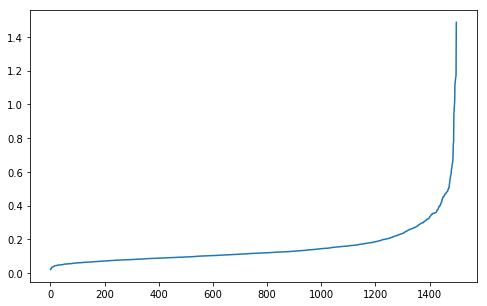

In [34]:
X_blobs = blobs[0]
Y_blobs = blobs[1]
dbscan = DBSCANClustering(min_pts=3)
PL = dbscan.select_param(X_blobs)

In [307]:
neighbors_ind, neighbors_dist, y_pred_blobs, noise = DBSCANClustering(eps=0.6, min_pts=3).fit_predict(X_blobs)
print ("Adjusted Rand index for blobs is: %.2f" % smt.adjusted_rand_score(Y_blobs, y_pred_blobs))

Adjusted Rand index for noisy_circles is: 0.99


## OPTICS

### 1. Тестовые данные

In [128]:
optics_demo = OPTICSClustering(eps=2, eps_s=2, min_pts=2)
order, y = optics_demo.fit_predict(X_demo)
y

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2]

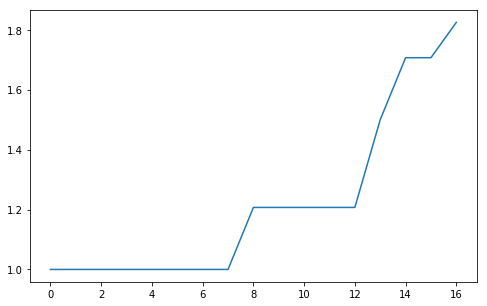

In [129]:
PLT = optics_demo.select_param(X_demo)

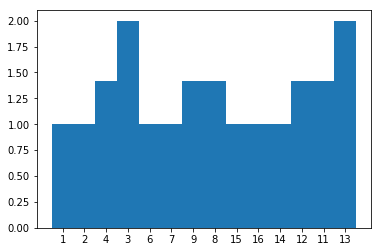

In [130]:
PLT = optics_demo.show_clasters()

### 2. Ирисы

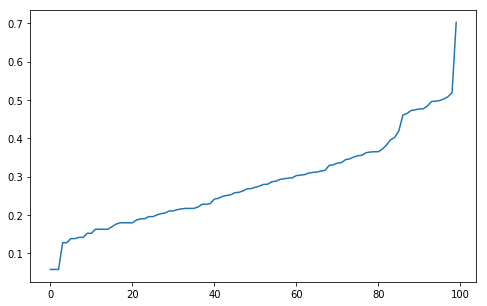

In [74]:
opt_iris = OPTICSClustering(min_pts=3)
PLT = opt_iris.select_param(x_iris)

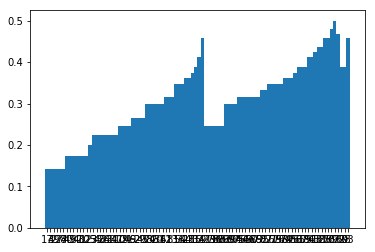

In [138]:
opt_iris = OPTICSClustering(eps=0.5, eps_s=0.5, min_pts=3)
order, y_pred_iris = opt_iris.fit_predict(x_iris)
PLT = opt_iris.show_clasters()

In [139]:
print ("Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, y_pred_iris))

Adjusted Rand index for iris is: 0.84


### 3. Стандартные распределения

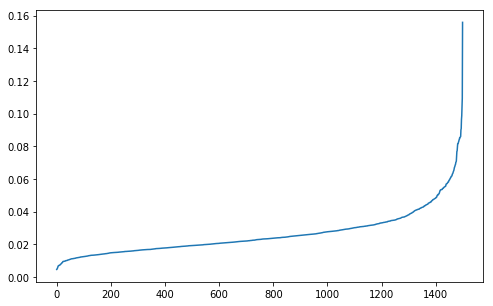

In [13]:
opt_circles = OPTICSClustering(min_pts=3)
PLT = opt_circles.select_param(noisy_circles[0])

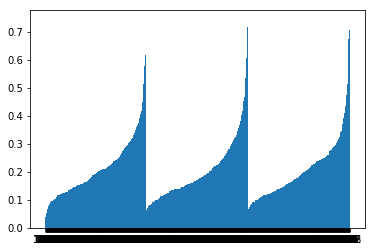

In [147]:
opt_circles = OPTICSClustering(eps=0.1, eps_s=0.1, min_pts=3)
order, y_pred_circles = opt_circles.fit_predict(noisy_circles[0])
PLT = opt.show_clasters()

In [150]:
print ("Adjusted Rand index for noisy_circles is: %.2f" % smt.adjusted_rand_score(noisy_circles[1], y_pred_circles))

Adjusted Rand index for noisy_circles is: 0.55


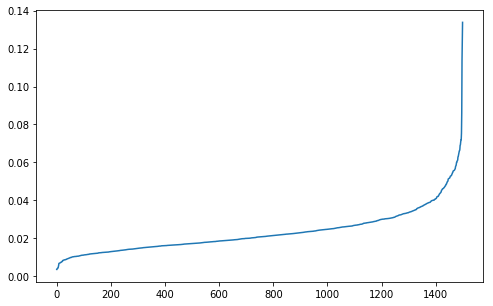

In [78]:
opt_moons = OPTICSClustering(min_pts=3)
PLT = opt_moons.select_param(noisy_moons[0])

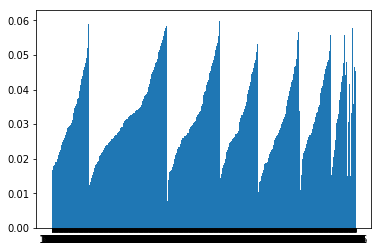

In [148]:
opt_moons = OPTICSClustering(eps=0.06, eps_s=0.06, min_pts=3)
order, y_pred_moons = opt_moons.fit_predict(noisy_moons[0])
PLT = opt_moons.show_clasters()

In [151]:
print ("Adjusted Rand index for noisy_moons is: %.2f" % smt.adjusted_rand_score(noisy_moons[1], y_pred_moons))

Adjusted Rand index for noisy_moons is: 0.35


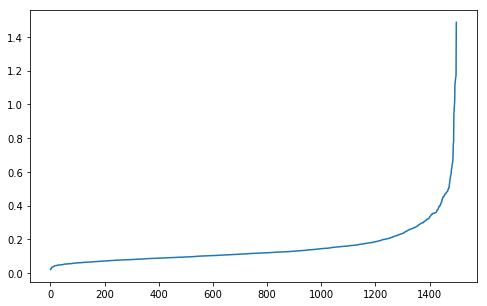

In [80]:
opt_blobs = OPTICSClustering(min_pts=3)
PLT = opt_blobs.select_param(blobs[0])

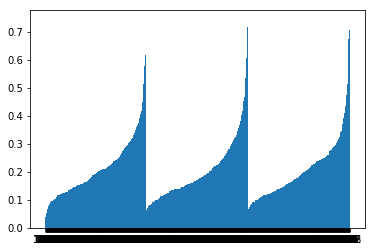

In [152]:
opt_blobs = OPTICSClustering(eps=0.8, eps_s=0.8, min_pts=3)
order, y_pred_blobs = opt_blobs.fit_predict(blobs[0])
PLT = opt_blobs.show_clasters()

In [153]:
print ("Adjusted Rand index for blobs is: %.2f" % smt.adjusted_rand_score(blobs[1], y_pred_blobs))

Adjusted Rand index for blobs is: 0.99


Подобрать параметры модели с использованием эвристик и критериев качества. 

Критерий локтя:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

Для DBSCAN применяется эвристика по подсчету среднего расстояния до min-pts точек, их сортировки, далее применяется критерий локтя (описание https://habrahabr.ru/post/322034/ или http://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf)

Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров, а так же при необходимости изменить этот код (для DBSCAN). На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров. Возможно, необходимо построить такую визуализацию несколько раз.

### Подбор параметров min_pts и eps для moons. Алгоритм OPTICS

Process min_pts=1 with eps=0.06...Done
Process min_pts=1 with eps=0.07...Done
Process min_pts=1 with eps=0.08...Done
Process min_pts=1 with eps=0.09...Done
Process min_pts=1 with eps=0.1...Done
Process min_pts=2 with eps=0.06...Done
Process min_pts=2 with eps=0.07...Done
Process min_pts=2 with eps=0.08...Done
Process min_pts=2 with eps=0.09...Done
Process min_pts=2 with eps=0.1...Done
Process min_pts=3 with eps=0.06...Done
Process min_pts=3 with eps=0.07...Done
Process min_pts=3 with eps=0.08...Done
Process min_pts=3 with eps=0.09...Done
Process min_pts=3 with eps=0.1...Done
Process min_pts=4 with eps=0.06...Done
Process min_pts=4 with eps=0.07...Done
Process min_pts=4 with eps=0.08...Done
Process min_pts=4 with eps=0.09...Done
Process min_pts=4 with eps=0.1...Done
Process min_pts=5 with eps=0.06...Done
Process min_pts=5 with eps=0.07...Done
Process min_pts=5 with eps=0.08...Done
Process min_pts=5 with eps=0.09...Done
Process min_pts=5 with eps=0.1...Done
Process min_pts=6 with eps=0.0

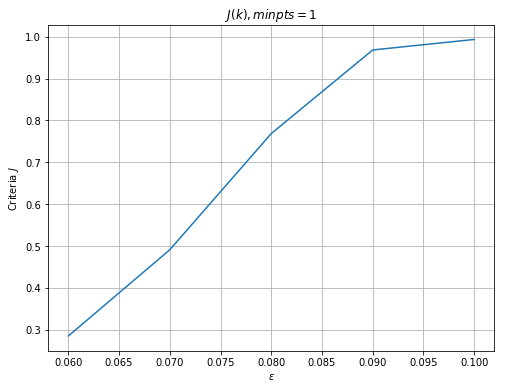

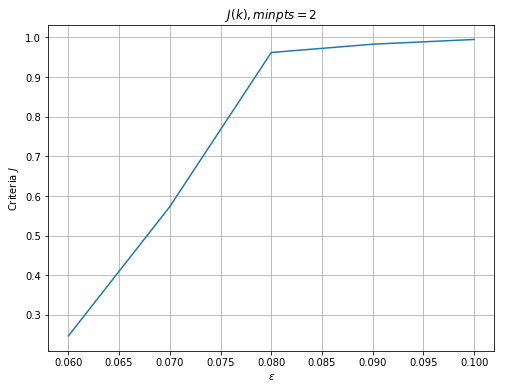

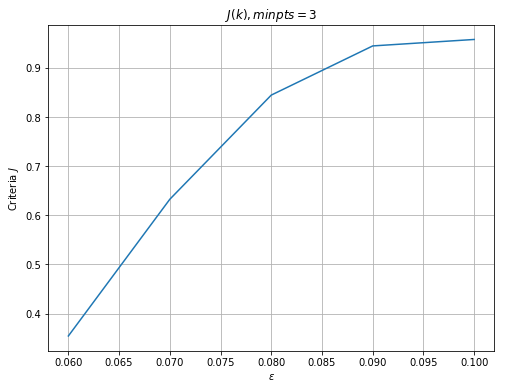

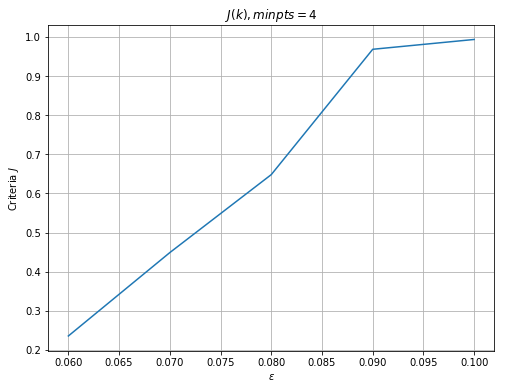

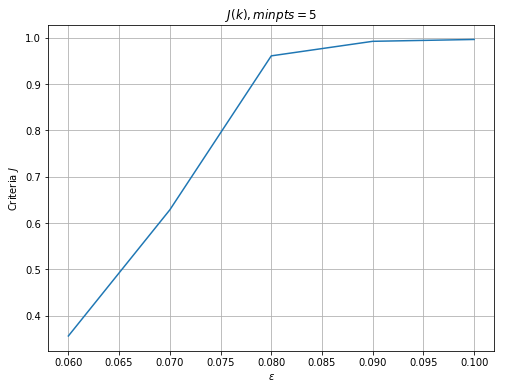

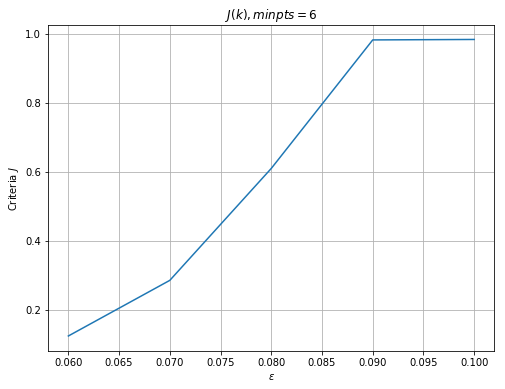

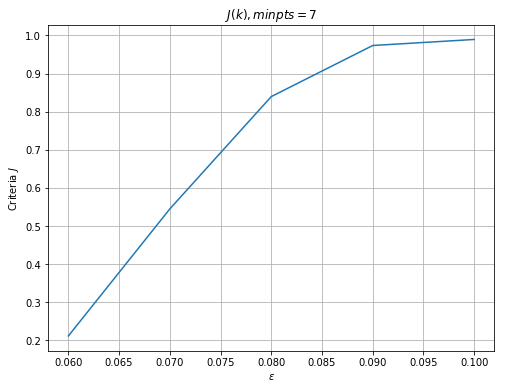

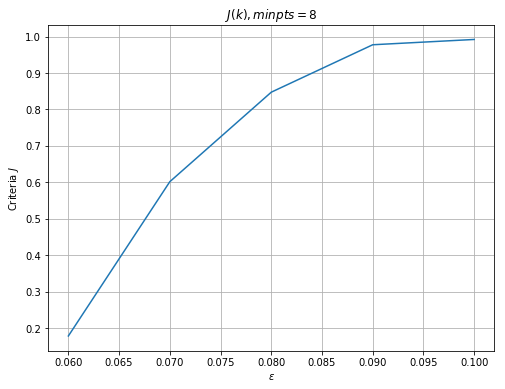

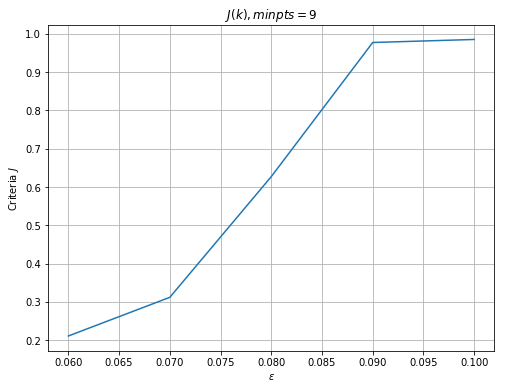

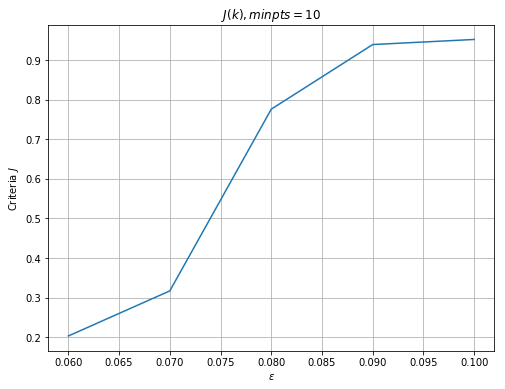

In [174]:
min_pts_range = range(1, 11)
epsilon_range = np.array(range(6, 11))/100

for i, min_pts in enumerate(min_pts_range):
    criteria = np.zeros(len(epsilon_range))
    for j, epsilon in enumerate(epsilon_range):
        print('Process min_pts={} with eps={}...'.format(min_pts, epsilon), end='')
        opt_moons = OPTICSClustering(eps=epsilon, eps_s=epsilon, min_pts=min_pts)
        order, y_pred_moons = opt_moons.fit_predict(noisy_moons[0])
        criteria[j] = smt.adjusted_rand_score(noisy_moons[1], y_pred_moons)
        print('Done')
    pl.figure(figsize=(8, 6))
    pl.plot(epsilon_range, criteria)
    pl.title("$J(k), minpts={}$".format(min_pts))
    pl.ylabel("Criteria $J$")
    pl.xlabel("$\epsilon$")
    pl.grid()    
    

pl.show()

0.996002656026


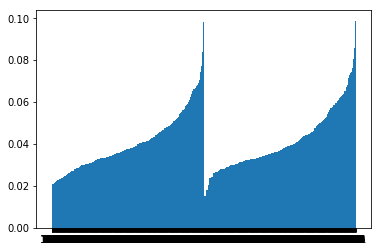

In [176]:
opt_moons = OPTICSClustering(eps=0.1, eps_s=0.1, min_pts=5)
order, y_pred_moons = opt_moons.fit_predict(noisy_moons[0])
print(smt.adjusted_rand_score(noisy_moons[1], y_pred_moons))
PLT = opt_moons.show_clasters()

## GMM

### 1. Тестовые данные

In [108]:
GMM = GMMClustering(K=3, max_iter=5)
g, E, R, W = GMM.fit(X_demo)
GMM.predict(X_demo)

[1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]

### 2. Ирисы

In [132]:
GMM = GMMClustering(K=3, max_iter=6)
g, E, R, W = GMM.fit(x_iris)
y_pred_iris = GMM.predict(x_iris)
print(y_pred_iris)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0]


In [133]:
print ("Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, y_pred_iris))

Adjusted Rand index for iris is: 0.86


### 3. Стандартные распределения

In [125]:
GMM = GMMClustering(K=2, max_iter=6)
g, E, R, W = GMM.fit(noisy_circles[0])
y_circles = GMM.predict(noisy_circles[0])
print ("Adjusted Rand index for circles is: %.2f" % smt.adjusted_rand_score(noisy_circles[1], y_circles))

Adjusted Rand index for circles is: 0.07


In [129]:
GMM = GMMClustering(K=2, max_iter=6)
g, E, R, W = GMM.fit(noisy_moons[0])
y_moons = GMM.predict(noisy_moons[0])
print ("Adjusted Rand index for circles is: %.2f" % smt.adjusted_rand_score(noisy_moons[1], y_moons))

Adjusted Rand index for circles is: 0.45


In [131]:
GMM = GMMClustering(K=3, max_iter=6)
g, E, R, W = GMM.fit(blobs[0])
y_blobs = GMM.predict(blobs[0])
print ("Adjusted Rand index for circles is: %.2f" % smt.adjusted_rand_score(blobs[1], y_blobs))

Adjusted Rand index for circles is: 1.00


Далее необходимо кластеризовать с помощью реализованного алгоритма данные, используемые для демонстраций на предыдущих занятиях. Предлагается сделать сравнение с реализацией из sklearn.